## RFM_Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('D:\\DBMS\\project\\project\\datascience\\RFM Analysis\\rfm_data.csv')

In [4]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [5]:
df.shape

(1000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [7]:
df.isnull().sum()


CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [8]:
# convert the PurchaseDate column into datetime dtype
from datetime import datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


# calculate RFM

In [10]:
# calculate Recency

df['Recency'] = (datetime.now().date()-df['PurchaseDate'].dt.date)

In [11]:
df['Recency'] = df['Recency'].astype(str)

In [12]:
df['Recency'] = df['Recency'].str.split(' ').str[0]

In [13]:
df['Recency']

0      638
1      638
2      638
3      638
4      638
      ... 
995    578
996    578
997    578
998    578
999    578
Name: Recency, Length: 1000, dtype: object

In [14]:
# calculate frequency 

frequency = df.groupby('CustomerID')['OrderID'].count().reset_index()

In [15]:

frequency.rename(columns ={'OrderID':'Frequency'}, inplace =True)

In [16]:
df = df.merge(frequency,on='CustomerID',how='left')

In [17]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,638,1
1,2188,2023-04-11,463.70,Product A,176819,London,638,1
2,4608,2023-04-11,80.28,Product A,340062,New York,638,1
3,2559,2023-04-11,221.29,Product A,239145,London,638,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,638,1
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,578,1
996,6669,2023-06-10,941.50,Product C,987025,New York,578,1
997,8836,2023-06-10,545.36,Product C,512842,London,578,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,578,1


In [18]:
# calculate Monetary

Monetry = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()

In [19]:
Monetry.rename(columns={'TransactionAmount':'MonetryValue'},inplace = 'True')

In [20]:
df = df.merge(Monetry, on = 'CustomerID', how ='left')

In [21]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,638,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,638,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,638,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,638,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,638,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,578,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,578,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,578,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,578,1,729.94


# Calculating the RFM Score

In [22]:
# Define scoring criteria for each RFM Value

Recency_score = [5,4,3,2,1] # higher score for lower recency
Frequency_score = [1,2,3,4,5] # higher score for higher frequency
Monetary_score = [1,2,3,4,5] # higher score for higher monetary

In [23]:
df['Recency'] = pd.to_numeric(df['Recency'], errors='coerce')

In [24]:
# calculate RFM Score
df['RecencyScore'] = pd.cut(df['Recency'], bins = 5, labels = Recency_score)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins = 5 , labels = Frequency_score) 
df['MonetaryScore'] = pd.cut(df['MonetryValue'], bins = 5 , labels = Monetary_score)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetryValue        1000 non-null   float64       
 9   RecencyScore        1000 non-null   category      
 10  FrequencyScore      1000 non-null   category      
 11  MonetaryScore       1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 74.0+ KB


In [26]:
# convert RFM Score to numeric dtype

df['RecencyScore'] = pd.to_numeric(df['RecencyScore'])
df['FrequencyScore'] = pd.to_numeric(df['FrequencyScore'])
df['MonetaryScore'] = pd.to_numeric(df['MonetaryScore'])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetryValue        1000 non-null   float64       
 9   RecencyScore        1000 non-null   int64         
 10  FrequencyScore      1000 non-null   int64         
 11  MonetaryScore       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 93.9+ KB


In [28]:
# calculate RFM score by combining the individual score together

df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

In [29]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,638,1,943.31,1,1,2,4
1,2188,2023-04-11,463.70,Product A,176819,London,638,1,463.70,1,1,1,3
2,4608,2023-04-11,80.28,Product A,340062,New York,638,1,80.28,1,1,1,3
3,2559,2023-04-11,221.29,Product A,239145,London,638,1,221.29,1,1,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,638,1,739.56,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,578,1,759.62,5,1,2,8
996,6669,2023-06-10,941.50,Product C,987025,New York,578,1,941.50,5,1,2,8
997,8836,2023-06-10,545.36,Product C,512842,London,578,1,545.36,5,1,2,8
998,1440,2023-06-10,729.94,Product B,559753,Paris,578,1,729.94,5,1,2,8


# RFM Value Segmentation 

In [30]:
segment_labels = ['Low_Value' , 'Mid_Value' , 'High_value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q =3 ,labels = segment_labels)

In [31]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,638,1,943.31,1,1,2,4,Low_Value
1,2188,2023-04-11,463.70,Product A,176819,London,638,1,463.70,1,1,1,3,Low_Value
2,4608,2023-04-11,80.28,Product A,340062,New York,638,1,80.28,1,1,1,3,Low_Value
3,2559,2023-04-11,221.29,Product A,239145,London,638,1,221.29,1,1,1,3,Low_Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,638,1,739.56,1,1,2,4,Low_Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,578,1,759.62,5,1,2,8,High_value
996,6669,2023-06-10,941.50,Product C,987025,New York,578,1,941.50,5,1,2,8,High_value
997,8836,2023-06-10,545.36,Product C,512842,London,578,1,545.36,5,1,2,8,High_value
998,1440,2023-06-10,729.94,Product B,559753,Paris,578,1,729.94,5,1,2,8,High_value


In [32]:
# RFM segment Disturbition 

segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment' , 'Count']

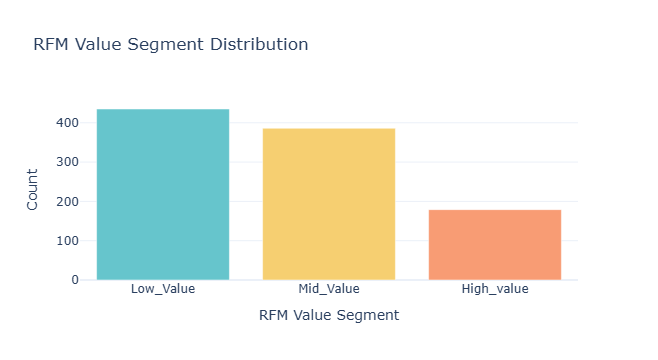

In [79]:
# Create a bar chart using Matplotlib
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()


In [60]:
# create RFM customer Segment

df['RFM Customer Segments'] = ''

# Assign RFM segment based on RFM score
# Assigning customer segments based on RFM scores
df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = 'Cant Lose'
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = 'Lost'



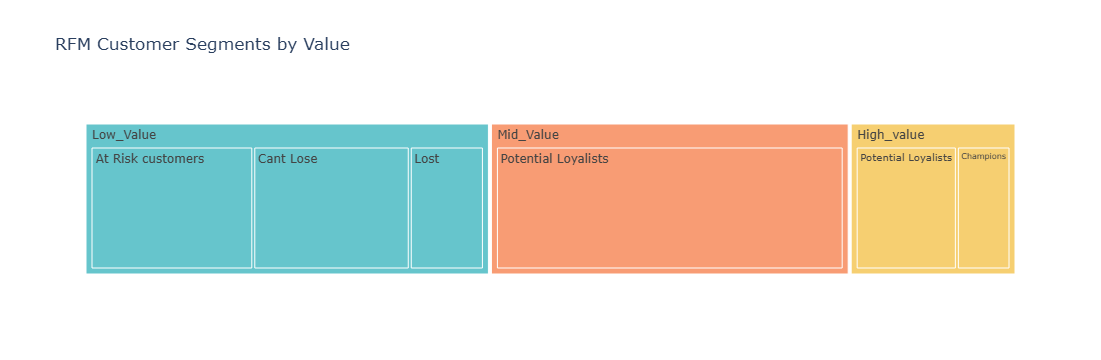

In [65]:
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(data_frame=segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

In [66]:
df['RFM Customer Segments'].value_counts()

RFM Customer Segments
Potential Loyalists    503
At Risk customers      180
Cant Lose              173
Lost                    82
Champions               62
Name: count, dtype: int64

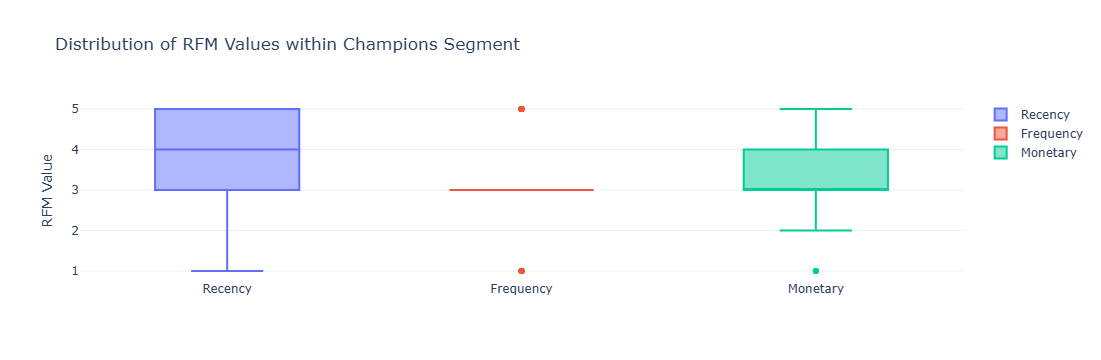

In [67]:
# Filter the data to include only the customers in the Champions segment
champions_segment = df[df['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

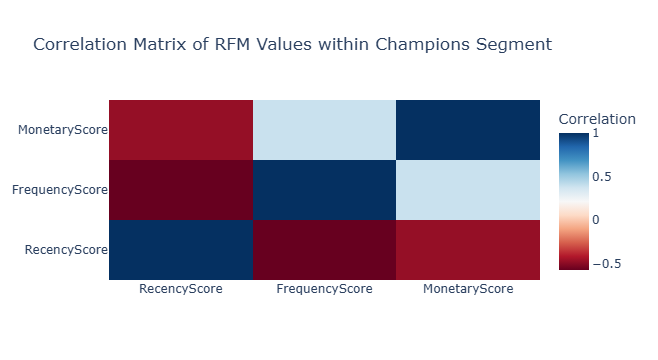

In [72]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

In [73]:
# Bar chart for number of customer in segment

import plotly.colors
pastel_colors = plotly.colors.qualitative.Pastel

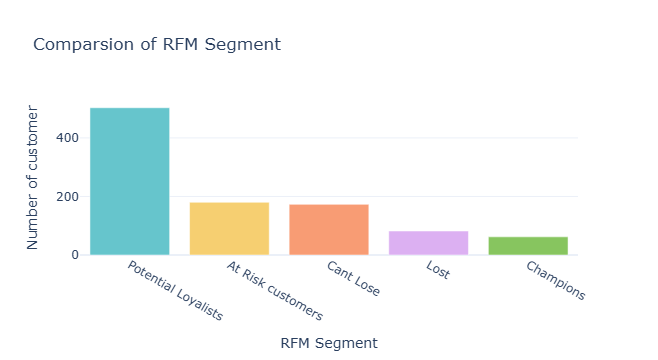

In [77]:
segment_counts = df['RFM Customer Segments'].value_counts()

fig = go.Figure(data=[go.Bar(x=segment_counts.index,
                           y=segment_counts.values,
                           marker=dict(color=pastel_colors))])

fig.update_layout(title='Comparsion of RFM Segment',
                  xaxis_title='RFM Segment',
                  yaxis_title='Number of customer',
                  showlegend=False)
fig.show()

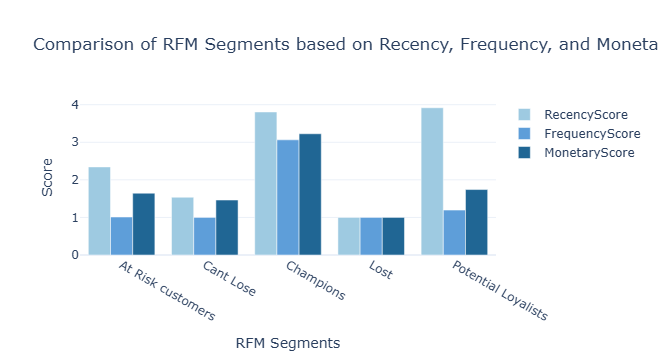

In [86]:
segment_scores = df.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='RecencyScore',
    marker_color='rgb(158,202,225)'
))

fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='FrequencyScore',
    marker_color='rgb(94,158,217)'
))

fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='MonetaryScore',
    marker_color='rgb(32,102,148)'
))

fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)
fig.show()

RFM Analysis is used to understand and segment customers based on their buying behaviour. RFM stands for recency, frequency, and monetary value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business.